<a href="https://colab.research.google.com/github/ilEnzio/Sexy_In_The_City/blob/master/ERLE_GRANGERII_DS18_Unit1_Build_Sprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

All the Libraries and Modules

In [9]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from collections import namedtuple
import operator

The Cleaned DataSet
(for the original data set, exploration and cleaning process, please refer to the other notebook.)

In [10]:
dnd_df = pd.read_csv("https://raw.githubusercontent.com/ilEnzio/Sexy_In_The_City/master/DND_clean_data.csv")

All the DataFrames and their defintions

In [11]:
# zcode_sale_df - subset of clean dataset with only the Zip Code and Sales Total Features
zcode_sales_df = pd.DataFrame({"zip_code": dnd_df["zip_code"], "sales_total": dnd_df["Sales_total"]})
zcode_sales_df.shape

(325, 2)

In [12]:
# photog_hourly_df - photographer average hourly wage according to ZipRecruiter
# and the D&D hourly wage
photog_hourly_df = pd.DataFrame({"Nation Wide": [21], "Northeast Florida": [19],
                                 "Diamonds & Desire": [80]})
photog_hourly_df

,Nation Wide,Northeast Florida,Diamonds & Desire
0,21,19,80


In [13]:
# dnd_makeup_only_df - subset of main df which only includes those who did NOT
# get professional Hair done. 

cond_mu_only = dnd_df["Hair"] == "no"
dnd_makeup_only_df = dnd_df[cond_mu_only]


In [14]:
# dnd_w_hair_df - subset of main df which only includes those who DID
# get professional Hair done.

cond_wHair = dnd_df["Hair"] == "yes"
dnd_w_hair_df = dnd_df[cond_wHair]



In [15]:
# dnd_styling_df - this df illustrates the value counts of make up or hair styling choice
dnd_styling_df = pd.DataFrame({"Service Type" :dnd_df["Hair"].value_counts()})
dnd_styling_df = dnd_styling_df.rename(index={"no": "Make-up Only",
                                        "yes": "Hair & Make-up"})

In [16]:
dnd_styling_df


,Service Type
Make-up Only,231
Hair & Make-up,94


In [17]:
# dnd_preference_df - illustrates the value counts of the "Favorite" feature 
# of the main dataset

dnd_preference_df = pd.DataFrame({"Preference" :dnd_df["Favorite"].value_counts()})

Variable which will be used throughout the notebook


In [18]:
middle_color = "#fb8b24"
worse_color= "#0f4c5c"
dnd_color ="#8C031C"

Functions used throughout the notebook

In [19]:
#  This functin will be helpful in generating an error bar graph
#  it outputs Margin of error, Upper and Lower Bound as a Named Tuple

def get_confidence_interval(sample, confidence_level):

  # because we like some np functions 
  # make a np array for our sample
  sample_np_array = np.array(sample)

  # variables we need for the calculations are 
  # std_dev, sample size, t-statistic

  std_dev = np.std(sample_np_array, ddof=1)
  sample_size = sample_np_array.shape[0]

  #here's the new one: from scipy stats 
  # Percent Point Function (Inverse of CDF)
  # this value take ?? percent of data that  as a parameter
  # does same thing as university of I. applet
  tstat = stats.t.ppf(1 - ((1 - confidence_level) / 2), sample_size-1)

  # need the sample mean as x_bar
  x_bar = np.mean(sample_np_array)

  # I need the standard error =
  # standard deviation / squareroot of sample size
  std_err = (std_dev/np.sqrt(sample_size))

  # now I need the Margin of Error
  # which is tstat * standard error
  moe = tstat*std_err

  # then for info purposes lets return the 
  # lower and upper bounds

  lower_bound = x_bar - moe
  upper_bound = x_bar + moe

  confidence_int = namedtuple("confidence_interval", ["lower_bound", "xbar","upper_bound","moe", ])

  # return (lower_bound, x_bar, upper_bound, moe)
  return confidence_int(lower_bound, x_bar, upper_bound, moe)

All Visualizations 

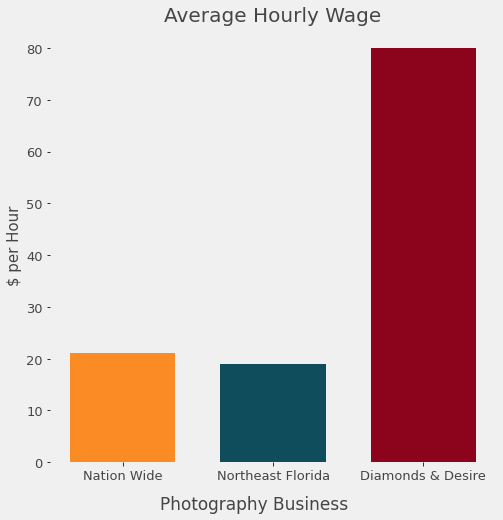

In [20]:
## Hourly wage comparison: Nation Wide, Regional, D&D

fig, ax = plt.subplots(figsize = (8,8))

# Set bg 

fig.set_facecolor("#F0F0F0")

# set graph background 

ax.set_facecolor("#F0F0F0")


# set label axis
plt.ylabel("$ per Hour",fontsize=15, color= "#454545")
# plt.xlabel("Photography Business Income",fontsize=17, color= "#454545",
#            x = .51, y=0)

ax.set_xticklabels(labels=photog_hourly_df.columns, fontsize=13, color= "#454545")
ax.set_yticklabels(labels=[0,10,20,30,40,50,60,70,80], fontsize=13, color= "#454545")

# make graph 
plt.bar(x=photog_hourly_df.columns, height=photog_hourly_df.loc[0,:], width=.7,
        color= ["#fb8b24", "#0f4c5c","#8C031C"])

# photog_hourly_df.plot.bar()

# set title
plt.title('Average Hourly Wage', fontsize=20, color= "#454545")

# Subtitle
subtitle_ = "Photography Business"
ax.text(s=subtitle_ ,fontsize=17, color= "#454545",
           x = .25, y=-9)

#remove spines
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.savefig('bar_chart_average_hourly_wage_comparison.png')
plt.show()

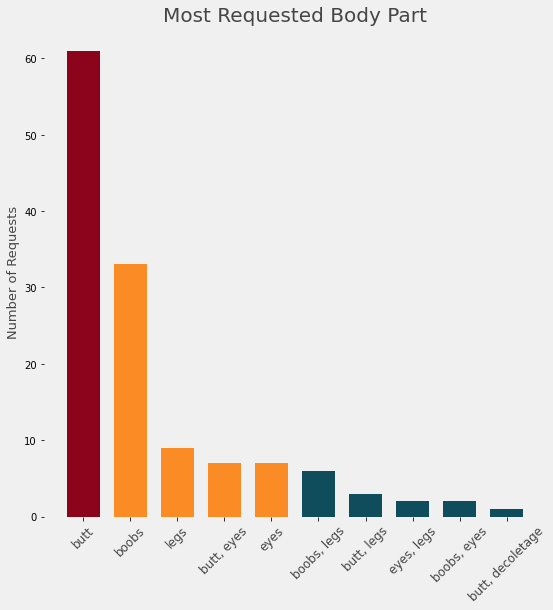

In [21]:
## Bar chart of Top Ten Requested Body Type 

fig, ax = plt.subplots(figsize = (9,9))


# Set bg 

fig.set_facecolor("#F0F0F0")

# set graph background 

ax.set_facecolor("#F0F0F0")

# dnd_preference_df["Preference"].iloc[1:11,].sort_values(ascending=False).plot.bar()
plt.bar(x=dnd_preference_df.index.values[1:11], 
        height=dnd_preference_df["Preference"].iloc[1:11,].sort_values(ascending=False),
        width=.7, color= [dnd_color,middle_color,middle_color, middle_color,
                          middle_color, worse_color, worse_color ,worse_color,
                          worse_color, worse_color])

# set label axis
# plt.ylabel("Average Hourly Wage",fontsize=20, color= "#454545")

ax.set_xticklabels(labels=dnd_preference_df.index.values[1:11], fontsize=12, color= "#454545")
plt.ylabel("Number of Requests", fontsize=13, color= "#454545")

# rotate x axis a bit
plt.xticks(rotation=45)

#add Title Most Requested Photo Preference 
plt.title('Most Requested Body Part', fontsize=20, color= "#454545")

#adjust fonts

#add colors 

# remove the spines
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.savefig('bar_chart_top_ten_favorites.png')

#this y axis should be percentages rather can counts

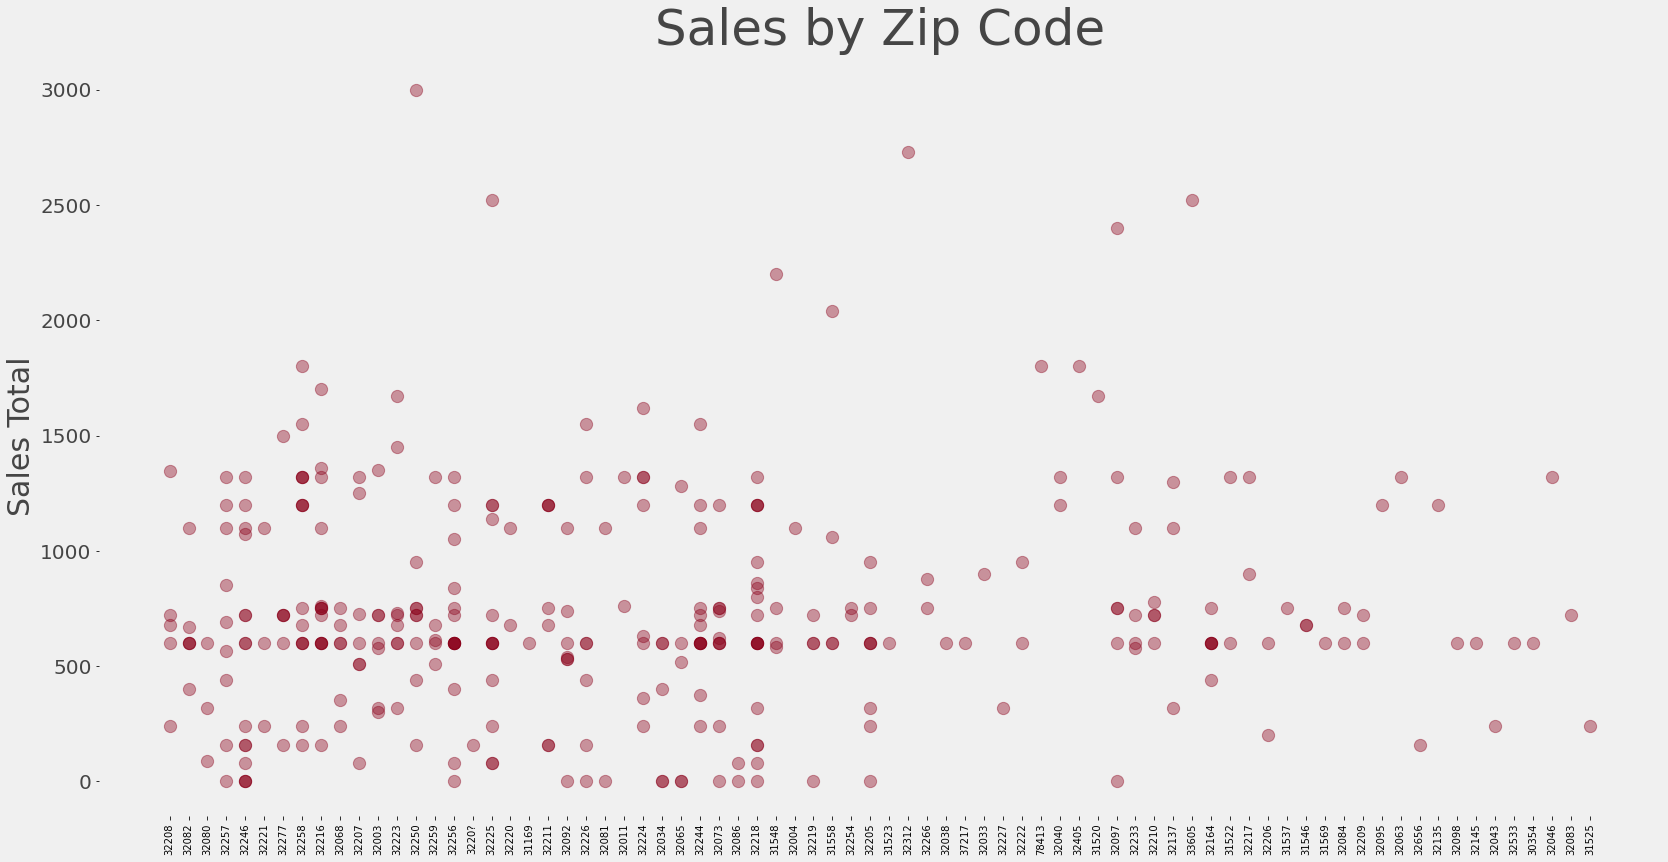

In [23]:
## Scatter plot of Total Sales of all Zip Codes


fig, ax = plt.subplots(figsize = (28,14))

# fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))


# Set bg 

fig.set_facecolor("#F0F0F0")

# set graph background 

ax.set_facecolor("#F0F0F0")

#make graph
plt.scatter(dnd_df["zip_code"],dnd_df["Sales_total"], alpha=.4, 
            c=dnd_color, s=150)


# label axis
plt.ylabel("Sales Total", fontsize=30, color= "#454545")

ax.set_yticklabels(labels=[0,0, 500, 1000, 1500,2000,2500,3000], fontsize=20, color= "#454545")


# rotate xticks
plt.xticks(rotation=90)

# set title
plt.title('Sales by Zip Code', fontsize=50, color= "#454545")


#remove spines
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)



plt.savefig("zip_code_vs_total_sales.png")

plt.show()

# I need to find a better way to show this graph.  I like that it splits the 
# sales data geographically, but the level is granularity is too much
# change graph of zip code so that codes are vertical

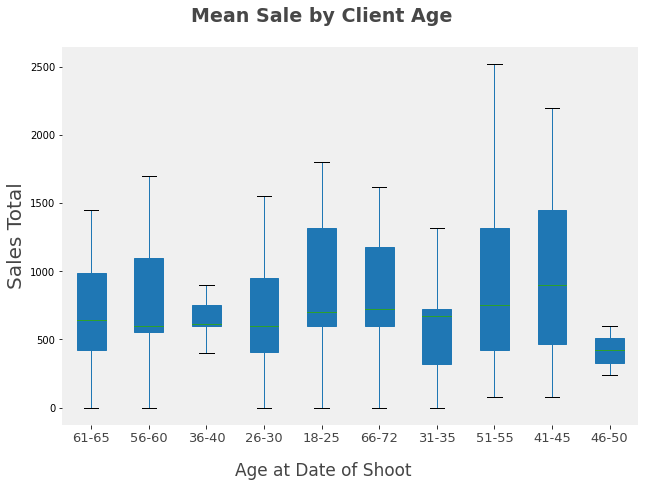

In [29]:
# Box Plot of Total Sales by Age Categorie



ax = dnd_df.boxplot(by="Age_Range", column="Sales_total", figsize=(10,7),
                          showfliers=False, patch_artist=True,
                          boxprops=dict(facecolor="#b36969", color="#b36969"))

# patch.set_facecolor("#b36969")

# Set bg 

fig.set_facecolor("#F0F0F0")

# set graph background 

ax.set_facecolor("#F0F0F0")


# set axis labls


ax.set_ylabel("Sales Total", fontsize=20, color= "#454545")
ax.set_xlabel("", fontsize=17, color= "#454545")



age_labels = dnd_df["Age_Range"].value_counts(sort=False).index

ax.set_xticklabels(labels= age_labels, fontsize=13, color= "#454545")


# remove grid lines
ax.grid(False)

grph_title = "Mean Sale by Client Age"
ax.set_title(grph_title, fontsize=19, fontweight = "bold", x =.45, y=1.05, 
             color="#474747" )

# Subtitle
subtitle_ = 'Age at Date of Shoot'
ax.text(s= subtitle_, fontsize = 17, x=3.5, y= -500,
        color="#454545")

# #remove spines
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.suptitle("")
plt.savefig('boxplot_age_range_v_sales.png')
plt.show()

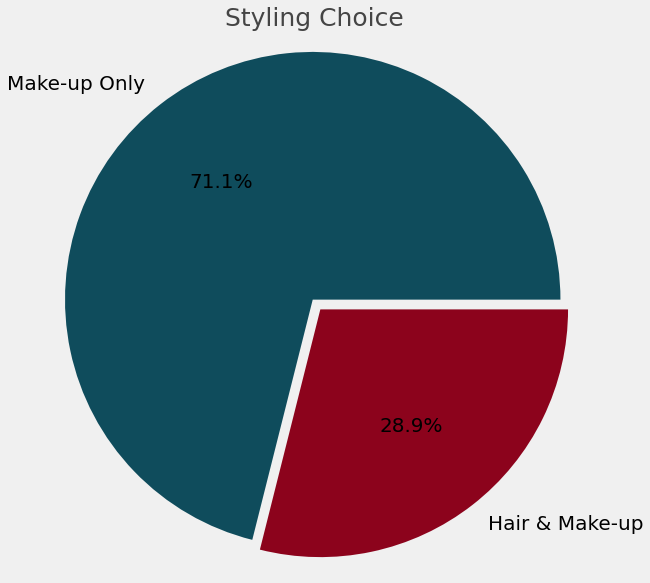

In [31]:
# Pie chart: Clients who recieve Professional Make-up only vs those who get Hair

fig, ax = plt.subplots(figsize = (10,10))

explode = (0,.05)

plt.pie(dnd_styling_df["Service Type"], labels=["Make-up Only", "Hair & Make-up"],
        autopct='%1.1f%%', explode = explode, textprops={'size': 20 },
        colors=[worse_color, dnd_color] )

# Set bg 

fig.set_facecolor("#F0F0F0")

# set graph background 

ax.set_facecolor("#F0F0F0")


# set title
plt.title('Styling Choice', fontsize=25, color= "#454545")

ax.axis("equal")
plt.savefig("pie_chart_makeup_v_hair.png")
plt.show()

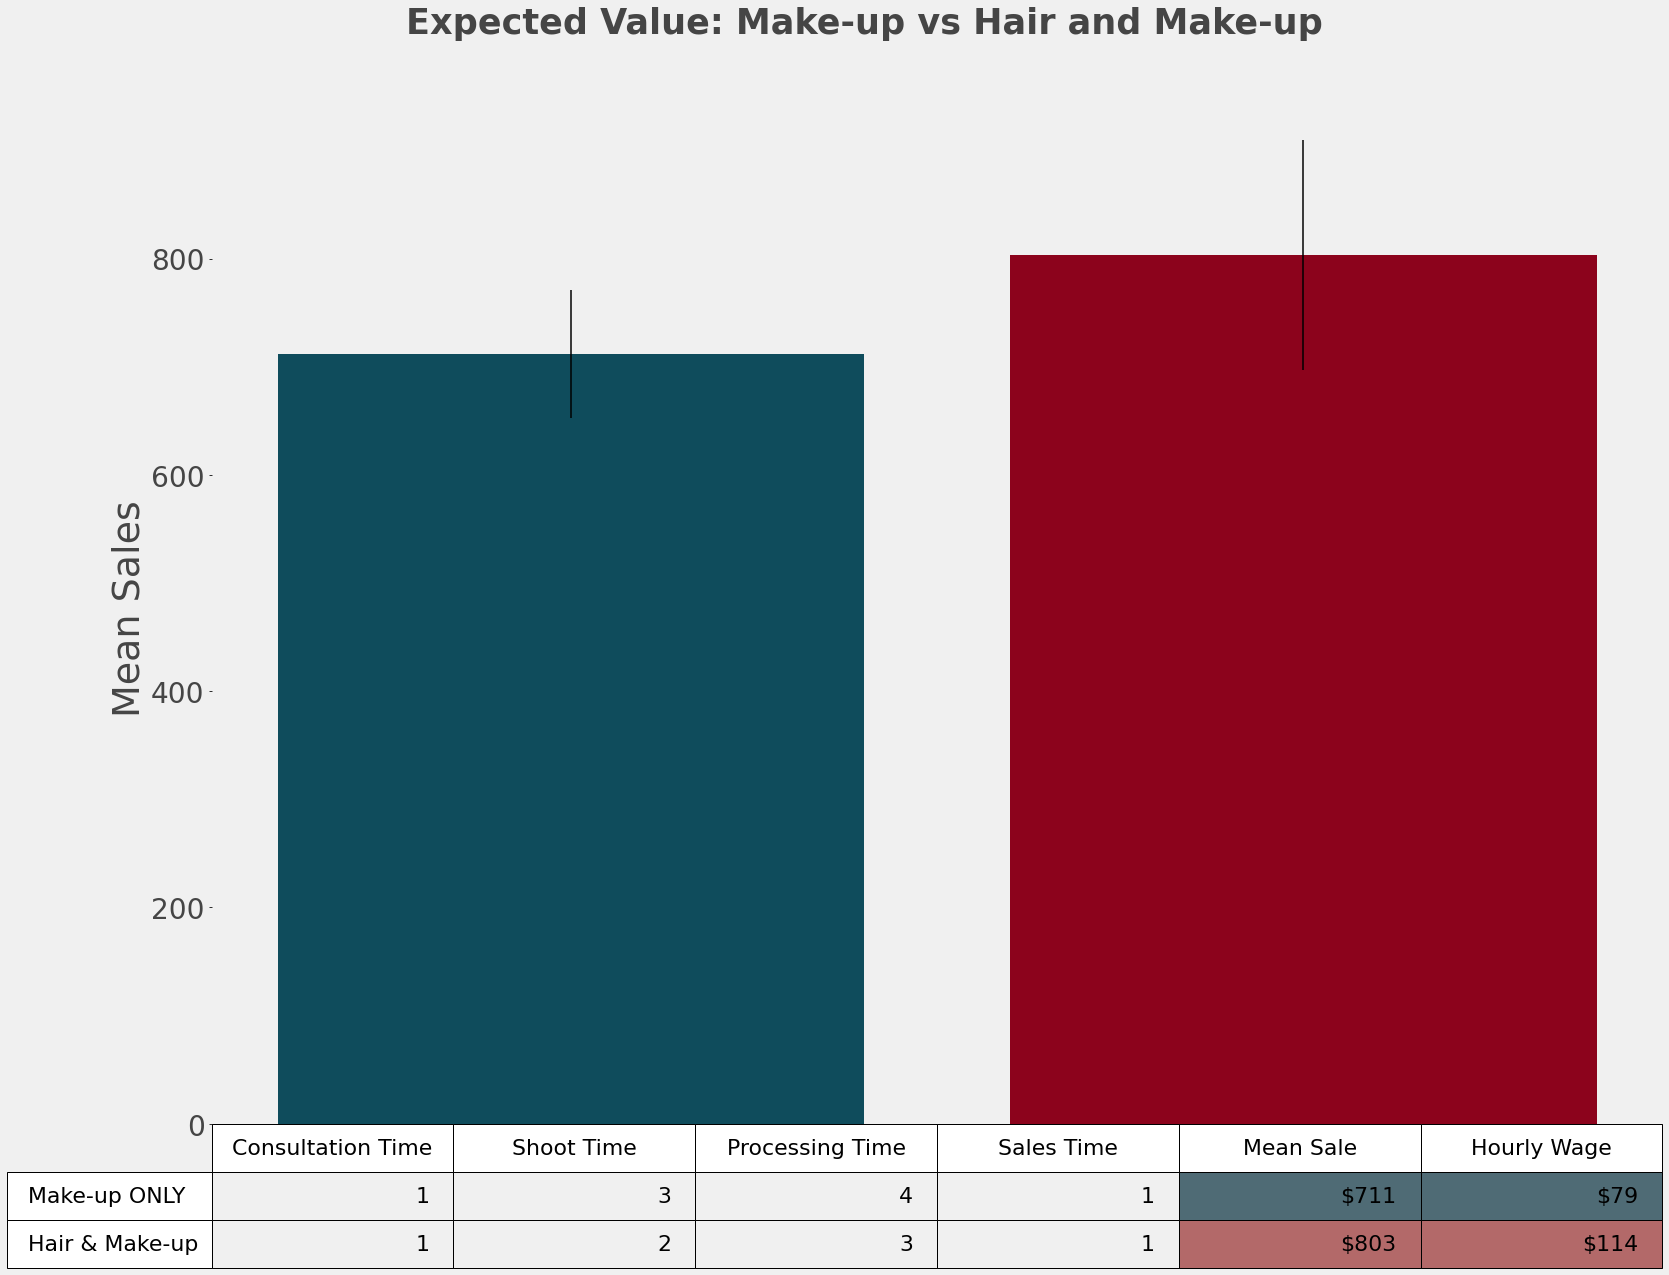

In [34]:

mu_sample_values = get_confidence_interval(dnd_makeup_only_df["Sales_total"], .95)
hair_sample_values = get_confidence_interval(dnd_w_hair_df["Sales_total"], .95)

# photoshoot ev comparison table

ev_comparison_df = pd.DataFrame({"Services": ["Make-up ONLY", "Hair & Make-up"],
                                 "Consultation Time": [1, 1], "Shoot Time" : [3,2],
                                 "Processing Time": [4,3], "Sales Time": [1,1],
                                 "Mean Sale": ["$711", "$803"], "Hourly Wage": ["$79", "$114"] })
ev_comparison_df


## Error Bar chart: Expected Value of Make-up Shoot Vs Hair Shoot

fig, ax = plt.subplots(figsize = (26,19))



# this graph I"m keeping and improving
plt.bar(0, height=mu_sample_values.xbar, yerr=mu_sample_values.moe,
        color=worse_color)
plt.bar(1, height=hair_sample_values.xbar, yerr=hair_sample_values.moe,
        color=dnd_color)

plt.title('Average Sales Session Mu vs Hair')

# Set bg 

fig.set_facecolor("#F0F0F0")

# set graph background 

ax.set_facecolor("#F0F0F0")

# label the x and y axis


plt.ylabel("Mean Sales", fontsize=38, color= "#454545")

# adjust  y ticks 
ax.set_yticklabels(labels=[0, 200, 400, 600,800], fontsize=28, color= "#454545")

# get rid of x ticks/labels
ax.axes.xaxis.set_visible(False)

# table at bottom

lightbl_color = "#4780b3"
lighto_color = "#ffb25e"
middle_color = "#fb8b24"
worse_color= "#0f4c5c"
dnd_color ="#8C031C"

colors = [["#F0F0F0","#F0F0F0","#F0F0F0","#F0F0F0","#4f6b75", "#4f6b75"],
          [ "#F0F0F0","#F0F0F0","#F0F0F0","#F0F0F0","#b36969", "#b36969"]]

cellText=[]
for row in ev_comparison_df["Services"]:
  cellText.append(row)
table = plt.table(cellText=ev_comparison_df.iloc[:,1:].values,
                  rowLabels=ev_comparison_df["Services"],
                  colLabels=ev_comparison_df.columns[1:],
                  cellColours=colors, 
                  loc='bottom')

table.set_fontsize(25)
table.scale(1,4)

# add title
ev_title = "Expected Value: Make-up vs Hair and Make-up"
plt.title(ev_title, fontsize=35, color= "#454545", fontweight = "bold", x =.45, y=1.05)


#remove spines
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)



plt.savefig('ev_sales_mu_v_hair.png')

plt.show()